In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var

In [2]:
df = pd.read_csv("SBI_Life_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [20]:
df.shape

(1338, 8)

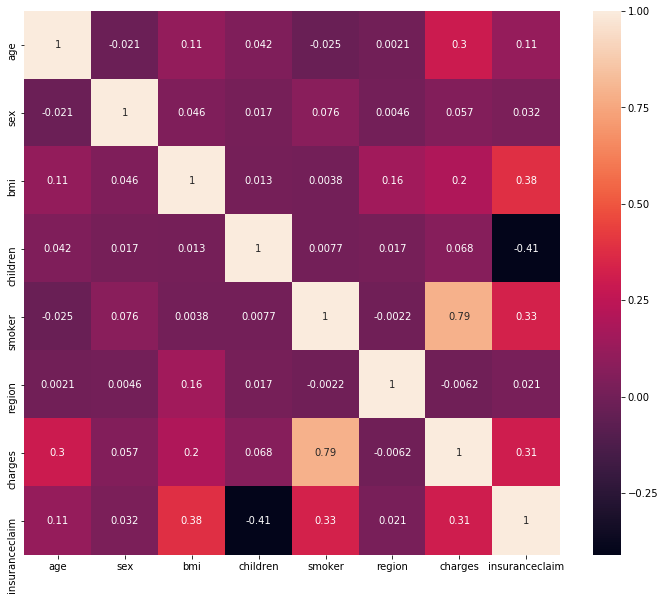

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [25]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


so we can see that the highest correlation between insuranceclaim and charges is 0.309 and also correlation between charges and smokers is very strong i.e:0.787.

In [4]:
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0
missing smoker values: 0


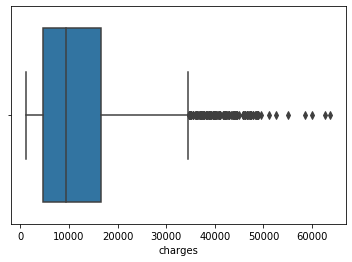

In [9]:
sns.boxplot(df['charges'])

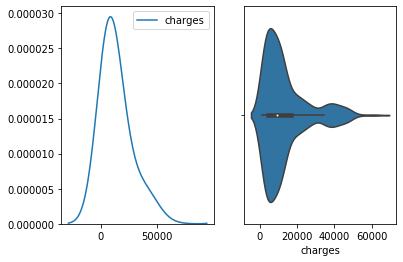

In [16]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['charges'], bw=10000, ax=axes[0])
sns.violinplot(df['charges'], ax=axes[1])
plt.show()

Both the boxplot and kernel density estimation plot reveal that the charges data is right skewed. Furthermore, there are some outliers but no missing charges and smoker values.

In [17]:
print ("Gender counts, 0=female, 1=male")
female = int (df.sex.value_counts()[0])
print (df.sex.value_counts())
print ("Prob Male: %.3f,\tProb Female: %.3f" % (1-(female/1338), (female/1338)))

Gender counts, 0=female, 1=male
1    676
0    662
Name: sex, dtype: int64
Prob Male: 0.505,	Prob Female: 0.495


# Objective Part 1: Do smokers have statistically higher mean individual medical costs billed by health insurance than do non-smokers?

In [18]:
print ("\n\nSmoker stats, 0=non-smoker, 1=smoker")
non_smoker = df.smoker.value_counts()[0]
print (df.smoker.value_counts())
print ("Prob Non-smoker: %.3f,\tProb smoker: %.3f" % ((non_smoker/1338), 1-(non_smoker/1338)))



Smoker stats, 0=non-smoker, 1=smoker
0    1064
1     274
Name: smoker, dtype: int64
Prob Non-smoker: 0.795,	Prob smoker: 0.205


In [19]:
print ("\n\nAge stats")
underage = df.age.between(0,17.999, inclusive=True).value_counts().get(True, 0)
adult = df.age.between(18, 39.999, inclusive=True).value_counts().get(True, 0)
overadult = df.age.between(40, 59.999, inclusive=True).value_counts().get(True, 0)
old = df.age.between(60, 200, inclusive=True).value_counts().get(True, 0)
print ("0-18: \t%d,\t%.3f" % (underage, underage/1338))
print ("18-40: \t%d,\t%.3f" % (adult, adult/1338))
print ("40-60: \t%d,\t%.3f" % (overadult, overadult/1338))
print ("60-: \t%d,\t%.3f" % (old, old/1338))



Age stats
0-18: 	0,	0.000
18-40: 	674,	0.504
40-60: 	550,	0.411
60-: 	114,	0.085


In [21]:
#prepare our 2 groups to test
smoker = df[df['smoker']==1]
non_smoker = df[df['smoker']==0]

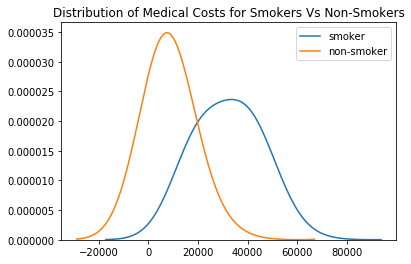

In [22]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], bw=10000, label='smoker')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

# Objective Part 2: Is a person's BMI correlated with individual medical costs billed by health insurance?

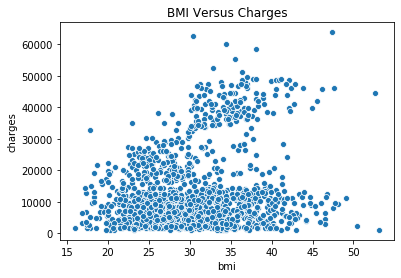

In [23]:
plt.title("BMI Versus Charges")
ax = sns.scatterplot(x="bmi", y="charges", data=df)
plt.show()

In [26]:
df.bmi.corr(df.charges)

0.1983409688336289

The scatterplot and correlation coefficient both reveal that bmi and charges have a very weak correlation. However, for charges larger than a specified amount, there might be a stronger correlation.

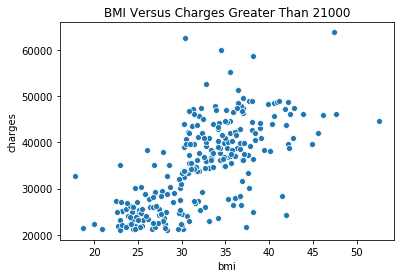

In [29]:
df_new = df[df['charges']>=21000]
plt.title("BMI Versus Charges Greater Than 21000")
ax = sns.scatterplot(x="bmi", y="charges", data=df_new)
plt.show()

In [30]:
df_new.bmi.corr(df.charges)

0.6724519995614608

After examining the convergence of correlation coefficients, I looked at charges larger than 21,000 USD. The scatterplot and correlation coefficient reveal a "moderate" positive relationship between bmi and charges larger than 21,000 USD.